<a href="https://colab.research.google.com/github/narora76/PyProject/blob/master/Airbnb_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#1. Load and view the data
airbnb = pd.read_csv('/Users/kach/Downloads/listings_2.csv')

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
airbnb.shape

(20677, 106)

In [0]:
airbnb.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59
5,29051,https://www.airbnb.com/rooms/29051,20190808195507,2019-08-09,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,the street is quite lively especially on weeke...,...,f,f,moderate,f,f,3,0,3,0,4.25
6,31080,https://www.airbnb.com/rooms/31080,20190808195507,2019-08-09,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.33
7,38266,https://www.airbnb.com/rooms/38266,20190808195507,2019-08-09,Nice and quiet place in the Jordaan,Cosy 1 bedroom apartment in Amsterdam's Jordaa...,"The apartment has a very nice feel with ""rivie...",Cosy 1 bedroom apartment in Amsterdam's Jordaa...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.81
8,42970,https://www.airbnb.com/rooms/42970,20190808195507,2019-08-09,Comfortable room@PERFECT location + 2 bikes,A home away from home Great location Including...,"What I offer: great location, comfortable bed,...",A home away from home Great location Including...,none,My home is in the best neighborhood. Everythin...,...,t,f,strict_14_with_grace_period,f,t,2,0,2,0,4.19
9,43109,https://www.airbnb.com/rooms/43109,20190808195507,2019-08-09,Oasis in the middle of Amsterdam,NaN,Welcome to my beautiful. light and spacious (1...,Welcome to my beautiful. light and spacious (1...,none,You almost can't be more central then this.,...,f,f,moderate,f,f,1,1,0,0,17.77


In [0]:
#check column names and types
airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [0]:
#change number of rows displayed
pd.set_option('display.max_rows', 500)

In [0]:
airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [0]:
#missing data overview
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [0]:
#2. Preprocessing the data
airbnb['id'].unique()

array([    2818,    20168,    25428, ..., 37586354, 37586530, 37590988])

In [0]:
airbnb['id'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [0]:
#is ID unique
airbnb['id'].nunique()

20677

In [0]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.7+ MB


In [0]:
airbnb['last_scraped'] =  pd.to_datetime(airbnb['last_scraped'], format='%Y-%m-%d')

In [0]:
type(airbnb['last_scraped'])

pandas.core.series.Series

In [0]:
airbnb['last_scraped'].describe()

count                   20677
unique                      3
top       2019-08-09 00:00:00
freq                    13225
first     2019-08-08 00:00:00
last      2019-09-03 00:00:00
Name: last_scraped, dtype: object

In [0]:
airbnb.groupby('last_scraped')['price'].count()

last_scraped
2019-08-08     7451
2019-08-09    13225
2019-09-03        1
Name: price, dtype: int64

In [0]:
#most data scraped concurrently (from above)

In [0]:
airbnb['notes'].head(10)

0    From week 38 to week 47 maintenance work to th...
1    Check-in time from 2pm till 10pm (But it doesn...
2                                                  NaN
3    we have a canadian canoe for you as well, free...
4    Washing and drying are for a flat fee of €15 p...
5    No smoking and no sleepovers pls Washing and d...
6    Amsterdam and its surroundings are best explor...
7                                                  NaN
8                                                  NaN
9                                                  NaN
Name: notes, dtype: object

In [0]:
airbnb['transit'].head(10)

0    The neighbourhood is well served by 24 hours p...
1    No need to use any transport! All is within a ...
2    The number 17 and #13 tram stop right outside ...
3    cental station aprox. 10 minutes on foot, buss...
4                                                  NaN
5                                                  NaN
6    To reach my apartment from Schiphol, take the ...
7                                                  NaN
8    It is pretty easy to rent a bike as every Dutc...
9    Plenty of public transport to bring you any di...
Name: transit, dtype: object

In [0]:
airbnb['access'].head(10)

0                                                  NaN
1                                                  NaN
2    The apartment is about 75 meters or 800 square...
3                   Your own apartment, nothing shared
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    You will have access to the whole apartment du...
8    You have your own room with everything you nee...
9                                            All Acces
Name: access, dtype: object

In [0]:
airbnb['interaction'].head(10)

0                                                  NaN
1    No curfew, free entrance 27/7 with your own ke...
2    However, our good friends who live close by ta...
3    As much as they want, and is possible. I speak...
4                                                  NaN
5                                                  NaN
6    Don't hesitate to contact me if you have any m...
7                                                  NaN
8    I live in the same building, so normally I am ...
9    We are very welcome to help you with everythin...
Name: interaction, dtype: object

In [0]:
airbnb['house_rules'].head(10)

0    Please: - Leave your shoes in the entrance  - ...
1    This studio/room takes entire floor and has it...
2    The building is a quiet building, so please do...
3    All the facilities  are included ( cleaning , ...
4                                                  NaN
5                                                  NaN
6              The entire house is a NON-smoking area.
7                                                  NaN
8    Please do not smoke and I love pets, but for h...
9                                                  NaN
Name: house_rules, dtype: object

In [0]:
airbnb_csv['host_name'].fillna('')

NameError: name 'airbnb_csv' is not defined

In [0]:
airbnb['host_name'].isnull().sum()

12

In [0]:
airbnb['host_since'].fillna(pd.Timestamp('19000101'))

0        2008-09-24
1        2009-12-02
2        2009-11-20
3        2010-03-23
4        2010-05-13
            ...    
20672    2013-05-25
20673    2019-08-08
20674    2013-10-04
20675    2017-05-25
20676    2015-10-03
Name: host_since, Length: 20677, dtype: object

In [0]:
airbnb['host_since'].isnull().sum()

12

In [0]:
airbnb['host_since'] = airbnb['host_since'].fillna(pd.Timestamp('19000101'))

In [0]:
airbnb['host_name'] = airbnb['host_name'].fillna('')

In [0]:
airbnb['host_since'].isnull().sum()

0

In [0]:
airbnb['host_name'].isnull().sum()

0

In [0]:
type(airbnb['host_since'])

pandas.core.series.Series

In [0]:
type(airbnb['host_since'][0])

str

In [0]:
airbnb['host_since'] =  pd.to_datetime(airbnb['host_since'], format='%Y-%m-%d')

In [0]:
type(airbnb['host_since'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
airbnb.groupby('host_since')['price'].count()

host_since
1900-01-01    12
2008-09-24     1
2008-10-12     1
2009-01-04     1
2009-02-15     1
              ..
2019-08-02     4
2019-08-05     3
2019-08-06     7
2019-08-07     4
2019-08-08     2
Name: price, Length: 3047, dtype: int64

In [0]:
airbnb.groupby('host_response_time')['price'].count()

host_response_time
a few days or more     333
within a day          2570
within a few hours    3016
within an hour        6217
Name: price, dtype: int64

In [0]:
airbnb['host_response_rate'].head(10)

0    100%
1    100%
2    100%
3    100%
4    100%
5    100%
6     NaN
7     50%
8    100%
9      0%
Name: host_response_rate, dtype: object

In [0]:
airbnb['host_response_rate'].isnull().sum()

8541

In [0]:
airbnb.host_response_time.value_counts(normalize=True)

within an hour        0.512278
within a few hours    0.248517
within a day          0.211767
a few days or more    0.027439
Name: host_response_time, dtype: float64

In [0]:
airbnb.groupby('host_is_superhost')['price'].count()

host_is_superhost
f    17451
t     3214
Name: price, dtype: int64

In [0]:
airbnb['host_is_superhost'].isnull().sum()

12

In [0]:
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].fillna('f')

In [0]:
airbnb['host_is_superhost'].isnull().sum()

0

In [0]:
airbnb.groupby('host_listings_count')['price'].count()

host_listings_count
0.0        451
1.0      14969
2.0       2700
3.0        716
4.0        291
5.0        182
6.0         94
7.0        111
8.0         67
9.0         54
10.0        24
11.0        67
12.0        35
13.0        41
14.0         6
15.0        32
16.0         1
17.0         1
18.0        31
19.0        13
20.0         6
22.0        25
23.0         1
25.0         6
27.0        27
29.0        30
30.0        22
31.0         7
32.0        30
33.0        44
47.0        37
53.0         7
62.0        48
76.0        12
93.0        69
99.0         8
115.0      105
131.0        1
139.0        2
217.0      208
435.0       79
486.0        2
739.0        1
980.0        2
Name: price, dtype: int64

In [0]:
airbnb['host_listings_count'].isnull().sum()

12

In [0]:
airbnb['host_listings_count'] = airbnb['host_listings_count'].fillna(0)

In [0]:
airbnb['host_total_listings_count'].isnull().sum()

12

In [0]:
airbnb['host_total_listings_count'] = airbnb['host_total_listings_count'].fillna(0)

In [0]:
airbnb['host_total_listings_count'].isnull().sum()

0

In [0]:
airbnb.groupby('host_identity_verified')['price'].count()

host_identity_verified
f    12602
t     8063
Name: price, dtype: int64

In [0]:
airbnb['host_identity_verified'].head(10)

0    f
1    f
2    f
3    t
4    t
5    t
6    t
7    f
8    f
9    t
Name: host_identity_verified, dtype: object

In [0]:
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna('f')

In [0]:
airbnb['host_identity_verified'].isnull().sum()

0

In [0]:
airbnb.neighbourhood_cleansed.value_counts(normalize=True)

De Baarsjes - Oud-West                    0.171640
De Pijp - Rivierenbuurt                   0.123809
Centrum-West                              0.112589
Centrum-Oost                              0.086908
Westerpark                                0.073995
Zuid                                      0.070803
Oud-Oost                                  0.065242
Bos en Lommer                             0.057068
Oostelijk Havengebied - Indische Buurt    0.047637
Oud-Noord                                 0.030227
Watergraafsmeer                           0.028582
IJburg - Zeeburgereiland                  0.023746
Slotervaart                               0.019539
Noord-West                                0.018136
Noord-Oost                                0.013783
Buitenveldert - Zuidas                    0.012574
Geuzenveld - Slotermeer                   0.010930
De Aker - Nieuw Sloten                    0.007448
Osdorp                                    0.007351
Gaasperdam - Driemond          

In [0]:
airbnb['neighbourhood_cleansed'].isnull().sum()

0

In [0]:
airbnb.groupby('city')['price'].count()

city
1015 SN Amsterdam                   1
AMSTERDAM                           1
Amstelveen                          3
Amsterdam                       20374
Amsterdam                          16
Amsterdam (Zunderdorp)              3
Amsterdam West                      1
Amsterdam Zuid-Oost                32
Amsterdam Zuidoost                  3
Amsterdam, Noord-Holland, NL        2
Amsterdam-Zuidoost                172
Amsterdão                           1
Badhoevedorp                        1
Bos en Lommer                       1
Central Amsterdam                   1
De Pijp                             6
Diemen                             10
Duivendrecht                       10
Haarlem                             1
Halfweg                             5
Jordaan                             3
Jordaan, Amsterdam                  1
Landsmeer                           3
Lijnden                             1
Nederland                           1
North Amsterdam                     7
Waterga

In [0]:
airbnb.groupby('smart_location')['price'].count()

smart_location
1015 SN Amsterdam, Netherlands                   1
AMSTERDAM, Netherlands                           1
Amstelveen, Netherlands                          3
Amsterdam (Zunderdorp), Netherlands              3
Amsterdam , Netherlands                         16
Amsterdam West, Netherlands                      1
Amsterdam Zuid-Oost, Netherlands                32
Amsterdam Zuidoost, Netherlands                  3
Amsterdam, Netherlands                       20375
Amsterdam, Noord-Holland, NL, Netherlands        2
Amsterdam-Zuidoost, Netherlands                172
Amsterdão, Netherlands                           1
Badhoevedorp, Netherlands                        1
Bos en Lommer, Netherlands                       1
Central Amsterdam, Netherlands                   1
De Pijp, Netherlands                             6
Diemen, Netherlands                             10
Duivendrecht, Netherlands                       10
Haarlem, Netherlands                             1
Halfweg, Netherl

In [0]:
airbnb['country'].isnull().sum()

0

In [0]:
airbnb.groupby('country')['price'].count()

country
Netherlands    20677
Name: price, dtype: int64

In [0]:
airbnb['is_location_exact'].head(10)

0    f
1    t
2    f
3    t
4    t
5    t
6    f
7    t
8    t
9    t
Name: is_location_exact, dtype: object

In [0]:
airbnb.groupby('is_location_exact')['price'].count()

is_location_exact
f     6206
t    14471
Name: price, dtype: int64

In [0]:
airbnb.groupby('property_type')['price'].count()

property_type
Aparthotel                  119
Apartment                 15832
Barn                          2
Bed and breakfast           549
Boat                        351
Boutique hotel               43
Bungalow                      3
Cabin                        10
Camper/RV                     5
Campsite                      1
Casa particular (Cuba)        3
Castle                        1
Chalet                        3
Condominium                 334
Cottage                      12
Dome house                    1
Earth house                   1
Guest suite                 146
Guesthouse                   49
Hostel                       29
Hotel                        23
House                      1641
Houseboat                   290
Hut                           1
Island                        1
Lighthouse                    1
Loft                        392
Nature lodge                  1
Other                        39
Serviced apartment           69
Tent                      

In [0]:
airbnb.property_type.value_counts(normalize=True)

Apartment                 0.765682
House                     0.079364
Townhouse                 0.032452
Bed and breakfast         0.026551
Loft                      0.018958
Boat                      0.016975
Condominium               0.016153
Houseboat                 0.014025
Guest suite               0.007061
Aparthotel                0.005755
Serviced apartment        0.003337
Guesthouse                0.002370
Boutique hotel            0.002080
Villa                     0.001886
Other                     0.001886
Hostel                    0.001403
Hotel                     0.001112
Cottage                   0.000580
Tiny house                0.000580
Cabin                     0.000484
Camper/RV                 0.000242
Casa particular (Cuba)    0.000145
Chalet                    0.000145
Bungalow                  0.000145
Barn                      0.000097
Yurt                      0.000097
Earth house               0.000048
Hut                       0.000048
Island              

In [0]:
airbnb.room_type.value_counts(normalize=True)

Entire home/apt    0.793249
Private room       0.202834
Shared room        0.003917
Name: room_type, dtype: float64

In [0]:
airbnb.accommodates.value_counts(normalize=True)

2     0.541423
4     0.306186
3     0.080573
1     0.023504
6     0.019877
5     0.018813
8     0.003869
7     0.002370
16    0.001451
10    0.000580
12    0.000532
9     0.000387
14    0.000145
11    0.000145
18    0.000048
17    0.000048
30    0.000048
Name: accommodates, dtype: float64

In [0]:
type(airbnb['bathrooms'])

pandas.core.series.Series

In [0]:
airbnb['bathrooms'] = airbnb['bathrooms'].fillna(0)

In [0]:
airbnb.bathrooms.value_counts(normalize=True)

1.0     0.770470
1.5     0.158243
2.0     0.046719
2.5     0.012187
3.0     0.003917
0.5     0.003627
3.5     0.002031
0.0     0.001644
4.0     0.000725
5.0     0.000145
4.5     0.000097
8.0     0.000097
15.0    0.000048
5.5     0.000048
Name: bathrooms, dtype: float64

In [0]:
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(0)

In [0]:
airbnb.bedrooms.value_counts(normalize=True)

1.0     0.588238
2.0     0.241911
3.0     0.083910
0.0     0.056101
4.0     0.024327
5.0     0.003917
6.0     0.000532
7.0     0.000290
12.0    0.000290
10.0    0.000193
8.0     0.000193
11.0    0.000048
9.0     0.000048
Name: bedrooms, dtype: float64

In [0]:
airbnb['beds'] = airbnb['beds'].fillna(0)

In [0]:
airbnb.beds.value_counts(normalize=True)

1.0     0.547468
2.0     0.255259
3.0     0.094356
4.0     0.066741
5.0     0.016734
6.0     0.010978
0.0     0.002128
7.0     0.001838
8.0     0.001644
10.0    0.000532
12.0    0.000484
16.0    0.000484
18.0    0.000290
32.0    0.000242
9.0     0.000193
14.0    0.000097
20.0    0.000097
15.0    0.000097
11.0    0.000097
24.0    0.000048
13.0    0.000048
22.0    0.000048
26.0    0.000048
30.0    0.000048
Name: beds, dtype: float64

In [0]:
airbnb.beds_type.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'beds_type'

In [0]:
airbnb.bed_type.value_counts(normalize=True)

Real Bed         0.991343
Pull-out Sofa    0.005755
Futon            0.001935
Airbed           0.000677
Couch            0.000290
Name: bed_type, dtype: float64

In [0]:
from collections import Counter

In [0]:
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

NameError: name 'df' is not defined

In [0]:
results = Counter()
airbnb['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

0        None
1        None
2        None
3        None
4        None
         ... 
20672    None
20673    None
20674    None
20675    None
20676    None
Name: amenities, Length: 20677, dtype: object

In [0]:
results.most_common(30)

[('Wifi', 20141),
 ('Heating', 19934),
 ('Essentials', 19904),
 ('Kitchen', 18704),
 ('Smoke detector', 16593),
 ('TV', 16061),
 ('Washer', 15617),
 ('Hangers', 14852),
 ('Laptop friendly workspace', 14093),
 ('Iron', 13813),
 ('Shampoo', 13773),
 ('Hair dryer', 13651),
 ('Hot water', 10011),
 ('Dryer', 9192),
 ('Fire extinguisher', 8695),
 ('Carbon monoxide detector', 8430),
 ('Family/kid friendly', 8107),
 ('First aid kit', 7774),
 ('Cable TV', 7761),
 ('Refrigerator', 7111),
 ('Internet', 6856),
 ('Dishes and silverware', 6809),
 ('Bed linens', 6740),
 ('Private entrance', 6621),
 ('Coffee maker', 6277),
 ('Oven', 6075),
 ('Stove', 5965),
 ('Cooking basics', 5916),
 ('Host greets you', 5785),
 ('Dishwasher', 5564)]

In [0]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

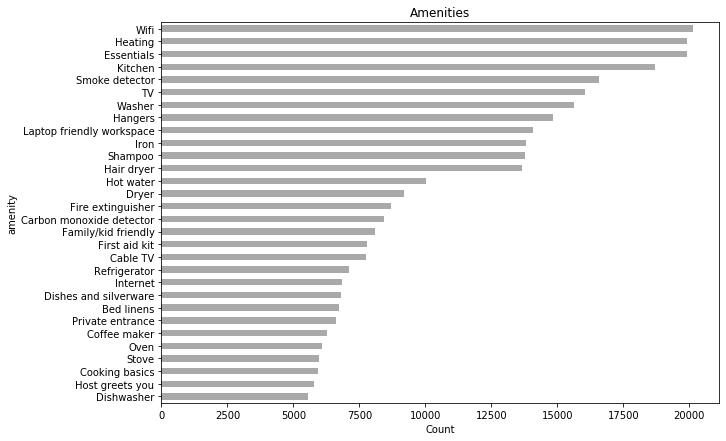

In [0]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

In [0]:
airbnb['smoke_detector'] = df['amenities'].str.contains('Smoke detector')
airbnb['TV'] = df['amenities'].str.contains('TV')
airbnb['washer'] = df['amenities'].str.contains('Washer')
airbnb['hangers'] = df['amenities'].str.contains('Hangers')
airbnb['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
airbnb['TV'] = df['amenities'].str.contains('TV')
airbnb['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')

NameError: name 'df' is not defined

In [0]:
airbnb['smoke_detector'] = airbnb['amenities'].str.contains('Smoke detector')
airbnb['TV'] = airbnb['amenities'].str.contains('TV')
airbnb['washer'] = airbnb['amenities'].str.contains('Washer')
airbnb['hangers'] = airbnb['amenities'].str.contains('Hangers')
airbnb['Laptop_friendly_workspace'] = airbnb['amenities'].str.contains('Laptop friendly workspace')
airbnb['iron'] = airbnb['amenities'].str.contains('Iron')
airbnb['shampoo'] = airbnb['amenities'].str.contains('Shampoo')
airbnb['hair_dryer'] = airbnb['amenities'].str.contains('Hair dryer')
airbnb['hot_water'] = airbnb['amenities'].str.contains('Hot water')
airbnb['dryer'] = airbnb['amenities'].str.contains('Dryer')
airbnb['fire_ex'] = airbnb['amenities'].str.contains('Fire extiguisher')
airbnb['carbon_monoxide_detect'] = airbnb['amenities'].str.contains('Carbon monoxide detector')
airbnb['Family_kid_friendly'] = airbnb['amenities'].str.contains('Family/kid friendly')

In [0]:
airbnb['security_deposit'] = airbnb['security_deposit'].fillna(0)

In [0]:
airbnb['cleaning_fee'] = airbnb['cleaning_fee'].fillna(0)

In [0]:
airbnb['extra_people'].head()

0    $20.00
1     $0.00
2    $10.00
3     $0.00
4     $0.00
Name: extra_people, dtype: object

In [0]:
type(airbnb['security_deposit'][0])

str

In [0]:
type(airbnb['cleaning_fee'][0])

str

In [0]:
df_raw.security_deposit.fillna('$0.00', inplace=True)

NameError: name 'df_raw' is not defined

In [0]:
airbnb.security_deposit.fillna('$0.00', inplace=True)

In [0]:
airbnb['guests_included'].head()

0    1
1    2
2    2
3    1
4    1
Name: guests_included, dtype: int64

In [0]:
airbnb['security_deposit'].isnull().sum()

0

In [0]:
airbnb['price'].isnull().sum()

0

In [0]:
airbnb['guests_included'].isnull().sum()

0

In [0]:
airbnb['cleaning_fee'].isnull().sum()

0

In [0]:
airbnb['extra_people'].isnull().sum()

0

In [0]:
airbnb.price = airbnb.price.str.replace('$', '').str.replace(',', '').astype(float)
airbnb.cleaning_fee = airbnb.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
airbnb.security_deposit = airbnb.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
airbnb.extra_people = airbnb.extra_people.str.replace('$', '').str.replace(',', '').astype(float)
airbnb.guests_included = airbnb.guests_included.str.replace('$', '').str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [0]:
airbnb.price = airbnb.price.str.replace('$', '').str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [0]:
type(airbnb.price)

pandas.core.series.Series

In [0]:
type(airbnb['price'][0])

numpy.float64

In [0]:
airbnb.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
summary                                                 object
space                                                   object
description                                             object
experiences_offered                                     object
neighborhood_overview                                   object
notes                                                   object
transit                                                 object
access                                                  object
interaction                                             object
house_rules                                             object
thumbnail_url                                          

In [0]:
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [0]:
airbnb['minimum_nights'].describe()

count    20677.000000
mean         3.546694
std         18.690394
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

In [0]:
airbnb['availability_30'].describe()

count    20677.000000
mean         3.783479
std          7.219078
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         30.000000
Name: availability_30, dtype: float64

In [0]:
airbnb['number_of_reviews'].describe()

count    20677.000000
mean        23.290323
std         48.619730
min          0.000000
25%          2.000000
50%          9.000000
75%         23.000000
max        767.000000
Name: number_of_reviews, dtype: float64

In [0]:
airbnb.groupby('cancellation_policy')['price'].count()

cancellation_policy
flexible                       5043
moderate                       7492
strict_14_with_grace_period    8003
super_strict_30                  26
super_strict_60                 112
Name: price, dtype: int64

In [0]:
airbnb.groupby('calculated_host_listings_count')['price'].count()

calculated_host_listings_count
1      16260
2       2286
3        549
4        232
5        155
6         90
7         84
8         64
9         36
10        40
11        33
12        72
13        13
15        30
18        18
19        19
21        21
22        22
25        25
26        26
27        27
29        29
37        37
48        48
69        69
79        79
105      105
208      208
Name: price, dtype: int64

In [0]:
#drop columns with too many NaN
airbnb.drop(columns=['space', 'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','host_neighbourhood','neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price','license'], inplace=True)

In [0]:
airbnb.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              35
summary                                          629
description                                      219
experiences_offered                                0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                     49
host_about                                      8600
host_response_time                              8541
host_response_rate                              8541
host_is_superhost                                  0
host_thumbnail_url                            

In [0]:
airbnb['host_about'].head(10)

0    Upon arriving in Amsterdam, one can imagine as...
1    Secondary phone nr. + (Phone number hidden by ...
2    We are a retired couple who live in NYC, and h...
3    Marjan works in "eye" the dutch filmmuseum, an...
4                                                   Hi
5                                                   Hi
6    (Hidden by Airbnb) Likes:\r\nOrishas, Manu Cha...
7    I'm a creative guy who fell in love with Amste...
8    Hi!\r\n\r\nI am Micha. I am running my place, ...
9    My name is Aukje\r\nI'm a visual artist and di...
Name: host_about, dtype: object

In [0]:
airbnb.name.fillna(value='', inplace=True)

In [0]:
airbnb.summary.fillna(value='', inplace=True)

In [0]:
airbnb.description.fillna(value='', inplace=True)

In [0]:
#drop columns with too many NaN
airbnb.drop(columns=['host_response_rate'], inplace=True)

In [0]:
type(airbnb.security_deposit)

pandas.core.series.Series

In [0]:
airbnb.security_deposit.head(10)

0    200.0
1      NaN
2    300.0
3      0.0
4      NaN
5      NaN
6      NaN
7    300.0
8    300.0
9      NaN
Name: security_deposit, dtype: float64

In [0]:
airbnb.security_deposit.fillna(value=0, inplace=True)

In [0]:
airbnb.cleaning_fee.fillna(value=0, inplace=True)

In [0]:
airbnb.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
summary                                                 object
description                                             object
experiences_offered                                     object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                     

In [0]:
airbnb.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
summary                                            0
description                                        0
experiences_offered                                0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                     49
host_about                                      8600
host_response_time                              8541
host_is_superhost                                  0
host_thumbnail_url                                12
host_picture_url                              

In [0]:
#drop columns with too many NaN
airbnb.drop(columns=['host_response_time'], inplace=True)

In [0]:
airbnb.host_about.fillna(value='', inplace=True)

In [0]:
airbnb.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
summary                                            0
description                                        0
experiences_offered                                0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                     49
host_about                                         0
host_is_superhost                                  0
host_thumbnail_url                                12
host_picture_url                                  12
host_listings_count                           

In [0]:
airbnb.neighbourhood.head(10)

0         Indische Buurt
1         Grachtengordel
2         Grachtengordel
3    Westelijke Eilanden
4      Amsterdam Centrum
5      Amsterdam Centrum
6               Oud-Zuid
7                Jordaan
8      Amsterdam Centrum
9         Grachtengordel
Name: neighbourhood, dtype: object

In [0]:
airbnb.neighbourhood_cleansed.head(10)

0    Oostelijk Havengebied - Indische Buurt
1                              Centrum-Oost
2                              Centrum-West
3                              Centrum-West
4                              Centrum-West
5                              Centrum-West
6                                      Zuid
7                              Centrum-West
8                              Centrum-West
9                              Centrum-West
Name: neighbourhood_cleansed, dtype: object

In [0]:
airbnb.groupby('neighbourhood_cleansed')['price'].count()

neighbourhood_cleansed
Bijlmer-Centrum                            116
Bijlmer-Oost                               115
Bos en Lommer                             1180
Buitenveldert - Zuidas                     260
Centrum-Oost                              1797
Centrum-West                              2328
De Aker - Nieuw Sloten                     154
De Baarsjes - Oud-West                    3549
De Pijp - Rivierenbuurt                   2560
Gaasperdam - Driemond                      141
Geuzenveld - Slotermeer                    226
IJburg - Zeeburgereiland                   491
Noord-Oost                                 285
Noord-West                                 375
Oostelijk Havengebied - Indische Buurt     985
Osdorp                                     152
Oud-Noord                                  625
Oud-Oost                                  1349
Slotervaart                                404
Watergraafsmeer                            591
Westerpark                           

In [0]:
airbnb.groupby('neighbourhood')['price'].count()

neighbourhood
Amsterdam Centrum                       745
Banne Buiksloot                         118
Bos en Lommer                          1222
Buiksloterham                           120
Buikslotermeer                          136
Buitenveldert-Oost                       77
Buitenveldert-West                      175
De Pijp                                 966
De Wallen                               109
Frederik Hendrikbuurt                   960
Grachtengordel                         1214
Hoofddorppleinbuurt                     250
IJplein en Vogelbuurt                   196
Indische Buurt                         1042
Jordaan                                 982
Kadoelen                                 59
Landelijk Noord                          92
Museumkwartier                          131
Nieuwendam-Noord                         73
Nieuwendammerdijk en Buiksloterdijk      14
Nieuwendammerham                          4
Nieuwmarkt en Lastage                   194
Oost              

In [0]:
airbnb.latitude.head(10)

0    52.36575
1    52.36509
2    52.37297
3    52.38673
4    52.36719
5    52.36773
6    52.35132
7    52.37565
8    52.36781
9    52.37537
Name: latitude, dtype: float64

In [0]:
airbnb.longitude.head(10)

0    4.94142
1    4.89354
2    4.88339
3    4.89208
4    4.89092
5    4.89151
6    4.84838
7    4.87969
8    4.89001
9    4.88932
Name: longitude, dtype: float64

In [0]:
from geopy.distance import great_circle

ModuleNotFoundError: No module named 'geopy'

In [0]:
from geopy.distance import great_circle

In [0]:
def distance_to_mid(lat, lon):
    amsterdam_centre = (52.379189, 4.899431)
    accommodation = (lat, lon)
    return great_circle(amsterdam_centre, accommodation).km

In [0]:
df_raw['distance'] = df_raw.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

NameError: name 'df_raw' is not defined

In [0]:
airbnb['distance'] = df_raw.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

NameError: name 'df_raw' is not defined

In [0]:
airbnb['distance'] = airbnb.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [0]:
airbnb.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,...,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,none,https://a0.muscache.com/im/pictures/10272854/8...,3159,...,True,True,True,True,True,False,False,True,False,3.218476
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...","Cozy studio on your own private floor, 100% in...",none,https://a0.muscache.com/im/pictures/69979664/3...,59484,...,True,False,False,True,True,False,False,True,False,1.617946


In [0]:
airbnb['distance'].head(2)

0    3.218476
1    1.617946
Name: distance, dtype: float64

In [0]:
airbnb.description.isna().sum()

0

In [0]:
airbnb['size'] = airbnb['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)

In [0]:
airbnb['size'] = airbnb['size'].str.replace("\D", "")

In [0]:
airbnb['size'] = airbnb['size'].astype(float)

In [0]:
airbnb[['description', 'size']].head(10)

,description,size
0,Quiet Garden View Room & Super Fast WiFi I'm r...,15.0
1,"Cozy studio on your own private floor, 100% in...",NaN
2,"This nicely furnished, newly renovated apt is...",NaN
3,Stylish and romantic houseboat on fantastic hi...,NaN
4,In a monumental house right in the center of A...,NaN
5,because of the city imposing a 4 paying guest ...,NaN
6,My apartment is light and cosy. The three bed...,NaN
7,Cosy 1 bedroom apartment in Amsterdam's Jordaa...,NaN
8,A home away from home Great location Including...,15.0
9,Welcome to my beautiful. light and spacious (1...,100.0


In [0]:
airbnb['size'].isnull().sum()

9032

In [0]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Columns: 102 entries, id to size
dtypes: bool(13), datetime64[ns](2), float64(23), int64(21), object(43)
memory usage: 14.3+ MB


In [0]:
#3. Exploratory data analysis

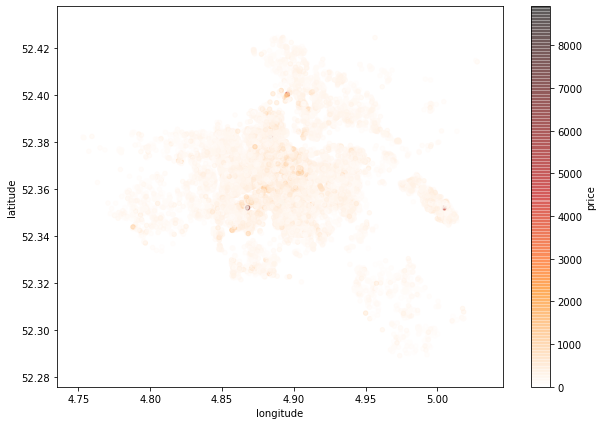

In [0]:
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

In [0]:
data_filtered = airbnb[airbnb['price'] < 400]

In [0]:
data_filtered.shape

(20048, 102)

In [0]:
airbnb['price'].describe()

count    20677.000000
mean       159.078686
std        162.464267
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

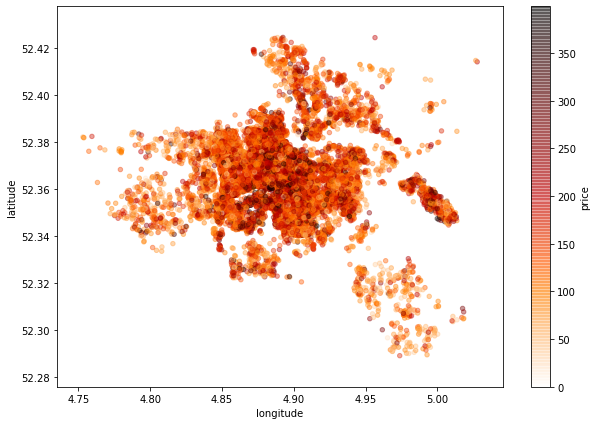

In [0]:
data_filtered.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

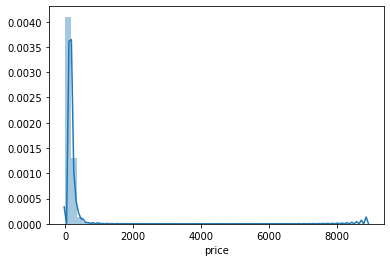

In [0]:
sns.distplot(airbnb['price'])

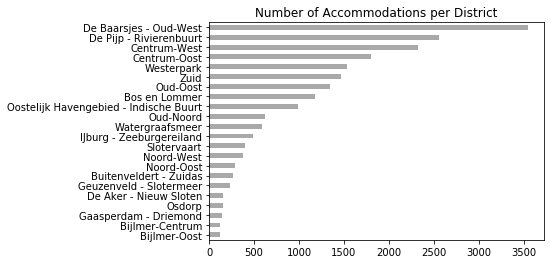

In [0]:
airbnb['neighbourhood_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

Text(0.5, 1.0, 'Neighbourhood Group Location')

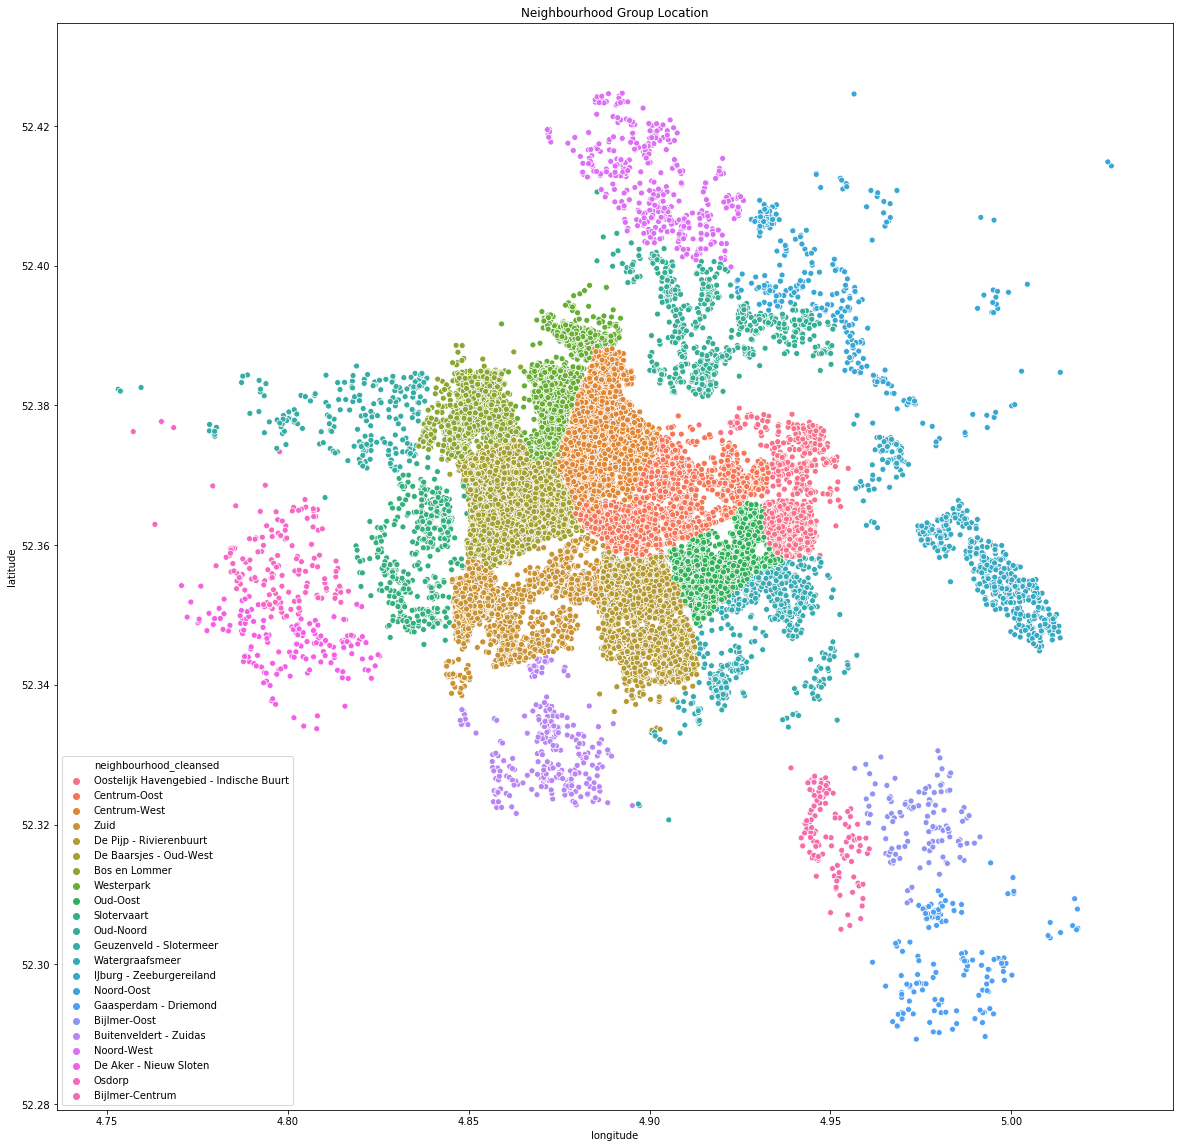

In [0]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(20,20))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_cleansed).set_title(title)

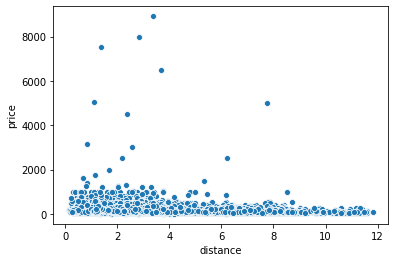

In [0]:
sns.scatterplot(x='distance',y='price',data=airbnb)

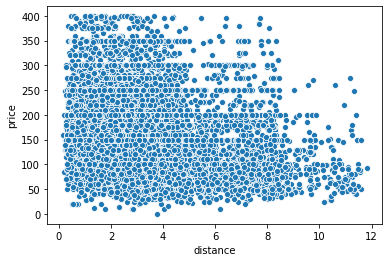

In [0]:
sns.scatterplot(x='distance',y=data_filtered['price'],data=airbnb)

In [0]:
y ='price'

In [0]:
x='room_type'

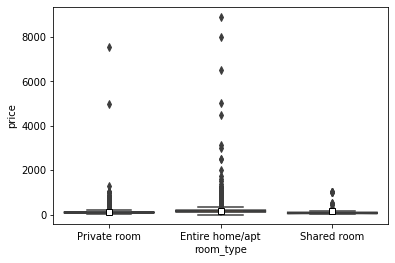

In [0]:
sns.boxplot(x=x, y=y, data=airbnb, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})

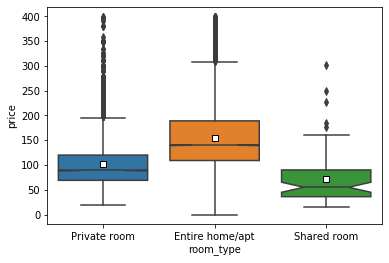

In [0]:
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})

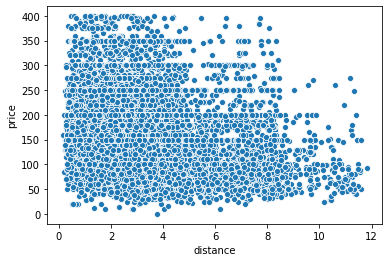

In [0]:
sns.scatterplot(x='distance',y=data_filtered['price'],data=data_filtered)

In [0]:
data_filtered['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [0]:
data_filtered_room_type = data_filtered[data_filtered['room_type']=='Entire home/apt']

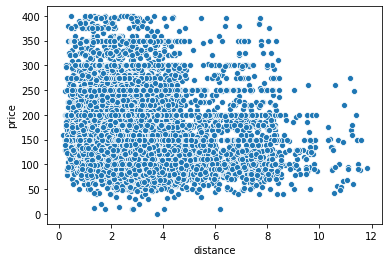

In [0]:
sns.scatterplot(x='distance',y=data_filtered_room_type['price'],data=data_filtered_room_type)

In [0]:
data_filtered.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
id,1.000000e+00,-1.315535e-13,5.048560e-01,7.845241e-02,7.845241e-02,-7.020205e-03,1.421297e-02,-8.022461e-04,5.076808e-02,-3.451783e-02,...,4.819449e-02,9.518653e-03,5.127285e-02,4.309460e-02,-3.748662e-02,NaN,-1.098240e-02,-3.894022e-01,6.979453e-02,-1.542030e-02
scrape_id,-1.315535e-13,1.000000e+00,-1.302383e-13,2.331669e-14,2.331669e-14,1.103538e-12,2.297409e-13,6.968536e-16,-6.067726e-15,-3.739695e-15,...,1.382568e-14,1.212321e-15,4.497372e-15,1.075365e-14,-9.655546e-15,NaN,-5.165751e-16,4.167924e-14,-1.128990e-14,2.074135e-16
host_id,5.048560e-01,-1.302383e-13,1.000000e+00,1.721686e-02,1.721686e-02,-4.205957e-03,2.477214e-02,8.053558e-03,3.733950e-03,-4.120794e-02,...,-1.964710e-02,3.136214e-03,2.334736e-03,-6.018023e-03,-7.173301e-02,NaN,-2.787599e-02,-2.135998e-01,3.539651e-02,-8.706764e-03
host_listings_count,7.845241e-02,2.331669e-14,1.721686e-02,1.000000e+00,1.000000e+00,7.795810e-03,-1.363711e-02,4.253474e-03,8.572761e-03,-3.364902e-03,...,-3.954085e-02,-4.969965e-02,2.632220e-02,-9.171800e-02,-1.504571e-02,NaN,5.758222e-02,-1.994416e-02,-3.491784e-02,1.823503e-02
host_total_listings_count,7.845241e-02,2.331669e-14,1.721686e-02,1.000000e+00,1.000000e+00,7.795810e-03,-1.363711e-02,4.253474e-03,8.572761e-03,-3.364902e-03,...,-3.954085e-02,-4.969965e-02,2.632220e-02,-9.171800e-02,-1.504571e-02,NaN,5.758222e-02,-1.994416e-02,-3.491784e-02,1.823503e-02
latitude,-7.020205e-03,1.103538e-12,-4.205957e-03,7.795810e-03,7.795810e-03,1.000000e+00,-1.522052e-01,1.813535e-02,-1.730327e-02,1.153708e-02,...,-2.744205e-02,-2.365443e-02,1.226013e-02,-1.744813e-04,-4.301171e-02,NaN,3.380805e-03,8.651012e-04,-5.597758e-01,-7.049656e-03
longitude,1.421297e-02,2.297409e-13,2.477214e-02,-1.363711e-02,-1.363711e-02,-1.522052e-01,1.000000e+00,8.329297e-02,7.662087e-02,9.670723e-02,...,-1.099305e-02,-1.724522e-02,5.176299e-03,1.700458e-02,9.646261e-03,NaN,-7.328427e-03,4.618209e-02,1.047061e-01,1.591559e-04
accommodates,-8.022461e-04,6.968536e-16,8.053558e-03,4.253474e-03,4.253474e-03,1.813535e-02,8.329297e-02,1.000000e+00,3.275965e-01,7.164833e-01,...,9.580746e-02,-1.075682e-02,5.050883e-02,5.831082e-03,1.717205e-01,NaN,2.794785e-02,3.104120e-01,8.147645e-02,7.646457e-02
bathrooms,5.076808e-02,-6.067726e-15,3.733950e-03,8.572761e-03,8.572761e-03,-1.730327e-02,7.662087e-02,3.275965e-01,1.000000e+00,3.854626e-01,...,9.774742e-02,3.155365e-02,7.986635e-02,3.322306e-02,1.495221e-01,NaN,4.186064e-02,8.578651e-02,6.241357e-02,8.923573e-02
bedrooms,-3.451783e-02,-3.739695e-15,-4.120794e-02,-3.364902e-03,-3.364902e-03,1.153708e-02,9.670723e-02,7.164833e-01,3.854626e-01,1.000000e+00,...,1.161123e-01,-3.182123e-02,2.727742e-02,7.437094e-03,2.370567e-01,NaN,2.152110e-02,2.959976e-01,1.351088e-01,9.056614e-02


In [0]:
type(data_filtered.corr())

pandas.core.frame.DataFrame

In [0]:
data_filtered.corr().round(decimals=3)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
id,1.000,-0.0,0.505,0.078,0.078,-0.007,0.014,-0.001,0.051,-0.035,...,0.048,0.010,0.051,0.043,-0.037,NaN,-0.011,-0.389,0.070,-0.015
scrape_id,-0.000,1.0,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000
host_id,0.505,-0.0,1.000,0.017,0.017,-0.004,0.025,0.008,0.004,-0.041,...,-0.020,0.003,0.002,-0.006,-0.072,NaN,-0.028,-0.214,0.035,-0.009
host_listings_count,0.078,0.0,0.017,1.000,1.000,0.008,-0.014,0.004,0.009,-0.003,...,-0.040,-0.050,0.026,-0.092,-0.015,NaN,0.058,-0.020,-0.035,0.018
host_total_listings_count,0.078,0.0,0.017,1.000,1.000,0.008,-0.014,0.004,0.009,-0.003,...,-0.040,-0.050,0.026,-0.092,-0.015,NaN,0.058,-0.020,-0.035,0.018
latitude,-0.007,0.0,-0.004,0.008,0.008,1.000,-0.152,0.018,-0.017,0.012,...,-0.027,-0.024,0.012,-0.000,-0.043,NaN,0.003,0.001,-0.560,-0.007
longitude,0.014,0.0,0.025,-0.014,-0.014,-0.152,1.000,0.083,0.077,0.097,...,-0.011,-0.017,0.005,0.017,0.010,NaN,-0.007,0.046,0.105,0.000
accommodates,-0.001,0.0,0.008,0.004,0.004,0.018,0.083,1.000,0.328,0.716,...,0.096,-0.011,0.051,0.006,0.172,NaN,0.028,0.310,0.081,0.076
bathrooms,0.051,-0.0,0.004,0.009,0.009,-0.017,0.077,0.328,1.000,0.385,...,0.098,0.032,0.080,0.033,0.150,NaN,0.042,0.086,0.062,0.089
bedrooms,-0.035,-0.0,-0.041,-0.003,-0.003,0.012,0.097,0.716,0.385,1.000,...,0.116,-0.032,0.027,0.007,0.237,NaN,0.022,0.296,0.135,0.091


In [0]:
#change number of rows displayed
pd.set_option('display.max_columns', 150)

In [0]:
data_filtered.corr().round(decimals=3)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
id,1.000,-0.0,0.505,0.078,0.078,-0.007,0.014,-0.001,0.051,-0.035,-0.035,0.067,-0.040,-0.044,-0.141,-0.054,-0.031,0.044,-0.031,-0.026,0.022,0.031,-0.028,0.026,0.156,0.151,0.138,-0.017,-0.321,-0.068,-0.017,-0.054,-0.035,-0.083,-0.066,0.026,-0.044,0.079,0.076,0.066,0.058,0.181,0.002,-0.089,-0.070,0.127,0.012,0.048,0.010,0.051,0.043,-0.037,NaN,-0.011,-0.389,0.070,-0.015
scrape_id,-0.000,1.0,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000
host_id,0.505,-0.0,1.000,0.017,0.017,-0.004,0.025,0.008,0.004,-0.041,0.002,0.025,-0.038,-0.046,-0.078,-0.028,-0.023,0.062,-0.023,-0.017,0.018,0.035,-0.019,0.025,0.165,0.174,0.171,0.089,-0.135,0.009,-0.115,-0.107,-0.081,-0.106,-0.099,-0.013,-0.083,0.014,0.011,0.066,0.069,0.168,-0.036,-0.036,-0.121,0.066,-0.016,-0.020,0.003,0.002,-0.006,-0.072,NaN,-0.028,-0.214,0.035,-0.009
host_listings_count,0.078,0.0,0.017,1.000,1.000,0.008,-0.014,0.004,0.009,-0.003,0.002,0.002,-0.021,0.099,-0.025,-0.006,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.132,-0.095,-0.075,-0.237,-0.181,-0.056,-0.113,0.893,0.892,0.097,0.348,-0.035,0.044,0.039,-0.036,0.044,0.069,-0.040,-0.050,0.026,-0.092,-0.015,NaN,0.058,-0.020,-0.035,0.018
host_total_listings_count,0.078,0.0,0.017,1.000,1.000,0.008,-0.014,0.004,0.009,-0.003,0.002,0.002,-0.021,0.099,-0.025,-0.006,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.132,-0.095,-0.075,-0.237,-0.181,-0.056,-0.113,0.893,0.892,0.097,0.348,-0.035,0.044,0.039,-0.036,0.044,0.069,-0.040,-0.050,0.026,-0.092,-0.015,NaN,0.058,-0.020,-0.035,0.018
latitude,-0.007,0.0,-0.004,0.008,0.008,1.000,-0.152,0.018,-0.017,0.012,0.033,0.011,0.002,0.017,0.020,0.018,-0.006,0.006,-0.004,-0.006,-0.002,0.002,-0.005,-0.000,-0.006,0.001,0.005,0.025,0.033,0.028,0.007,0.004,-0.003,0.005,0.002,0.017,0.006,0.014,0.013,0.003,0.033,0.019,0.019,-0.024,-0.046,-0.012,-0.012,-0.027,-0.024,0.012,-0.000,-0.043,NaN,0.003,0.001,-0.560,-0.007
longitude,0.014,0.0,0.025,-0.014,-0.014,-0.152,1.000,0.083,0.077,0.097,0.118,0.024,0.017,0.037,0.035,0.003,0.004,-0.004,0.003,0.004,-0.007,-0.006,0.004,-0.007,0.009,0.013,0.017,0.025,0.002,0.008,-0.006,-0.001,-0.015,0.006,0.007,-0.003,0.009,-0.015,-0.017,0.049,0.009,0.015,0.017,-0.027,-0.014,0.006,-0.001,-0.011,-0.017,0.005,0.017,0.010,NaN,-0.007,0.046,0.105,0.000
accommodates,-0.001,0.0,0.008,0.004,0.004,0.018,0.083,1.000,0.328,0.716,0.771,0.495,0.103,0.297,0.383,0.167,0.012,-0.006,0.011,0.011,-0.012,-0.012,0.011,-0.011,-0.020,-0.020,-0.018,0.016,-0.062,-0.068,-0.036,-0.062,-0.066,-0.016,-0.024,-0.052,-0.040,0.005,0.011,-0.114,-0.032,-0.076,0.048,0.129,0.092,0.044,0.074,0.096,-0.011,0.051,0.006,0.172,NaN,0.028,0.310,0.081,0.076
bathrooms,0

In [0]:
x = data_filtered[['accommodates','cleaning_fee','security_deposit','TV','iron','dryer']]

In [0]:
y=data_filtered[['price']]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [0]:
print(model.score(x_test, y_test))

0.31142087810475294


In [0]:
mod = ols('price ~ accommodates', data=airbnb).fit()

In [0]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [0]:
print(aov_table)

                    sum_sq       df            F  PR(>F)
accommodates  5.521139e+07      1.0  2327.093448     0.0
Residual      4.905241e+08  20675.0          NaN     NaN


In [0]:
x[['bathrooms']] = data_filtered[['bathrooms']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.dtypes

accommodates          int64
cleaning_fee        float64
security_deposit    float64
TV                     bool
iron                   bool
dryer                  bool
bathrooms           float64
dtype: object

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.3110744114050582


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms
0,2,60.0,200.0,False,True,False,1.5
1,2,0.0,0.0,True,False,False,1.0
2,3,40.0,300.0,True,True,True,1.0
3,2,0.0,0.0,True,False,False,1.0
4,2,0.0,0.0,False,False,True,1.0


In [0]:
x.isnull().sum()

accommodates        0
cleaning_fee        0
security_deposit    0
TV                  0
iron                0
dryer               0
bathrooms           0
dtype: int64

In [0]:
x[['guests_included']] = airbnb[['guests_included']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.isnull().sum()

accommodates        0
cleaning_fee        0
security_deposit    0
TV                  0
iron                0
dryer               0
bathrooms           0
guests_included     0
dtype: int64

In [0]:
x[['extra_people']] = airbnb[['extra_people']]

In [0]:
x[['extra_people']].head()

,extra_people
0,20.0
1,0.0
2,10.0
3,0.0
4,0.0


In [0]:
x[['minimum_nights']] = airbnb[['minimum_nights']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
 airbnb[['minimum_nights']].head()

,minimum_nights
0,3
1,1
2,14
3,2
4,2


In [0]:
airbnb[['review_scores_location']].head()

,review_scores_location
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0


In [0]:
x[['review_scores_location']] = airbnb[['review_scores_location']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
airbnb[['review_scores_location']].head()

,review_scores_location
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0


In [0]:
airbnb[['smoke_detector']].head()

,smoke_detector
0,True
1,True
2,True
3,True
4,True


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0


In [0]:
airbnb[['smoke_detector']] = airbnb[['smoke_detector']]

In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0


In [0]:
x.dtypes

accommodates                int64
cleaning_fee              float64
security_deposit          float64
TV                           bool
iron                         bool
dryer                        bool
bathrooms                 float64
guests_included             int64
extra_people              float64
minimum_nights              int64
review_scores_location    float64
dtype: object

In [0]:
airbnb[['hangers']] = airbnb[['hangers']]

In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0


In [0]:
x[['hangers']] = airbnb[['hangers']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0,True
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0,True
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0,True
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0,True
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0,True


In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['hangers','TV','iron','dryer'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0,True
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0,True
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0,True
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0,True
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0,True


In [0]:
airbnb_en

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,none,https://a0.muscache.com/im/pictures/10272854/8...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",59.0,200.0,60.0,1,20.0,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12,True,0,True,0,True,0,True,True,True,0,False,True,False,3.218476,15.0
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...","Cozy studio on your own private floor, 100% in...",none,https://a0.muscache.com/im/pictures/69979664/3...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",80.0,0.0,0.0,2,0.0,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46,True,1,False,0,True,1,False,True,True,0,False,True,False,1.61

In [0]:
x[['TV']] = airbnb[['TV']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,False,True,False,1.5,1,20.0,3,10.0,True
1,2,0.0,0.0,True,False,False,1.0,2,0.0,1,10.0,True
2,3,40.0,300.0,True,True,True,1.0,2,10.0,14,10.0,True
3,2,0.0,0.0,True,False,False,1.0,1,0.0,2,10.0,True
4,2,0.0,0.0,False,False,True,1.0,1,0.0,2,10.0,True


In [0]:
x[['TV']] = airbnb_en[['TV']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,0,True,False,1.5,1,20.0,3,10.0,True
1,2,0.0,0.0,1,False,False,1.0,2,0.0,1,10.0,True
2,3,40.0,300.0,1,True,True,1.0,2,10.0,14,10.0,True
3,2,0.0,0.0,1,False,False,1.0,1,0.0,2,10.0,True
4,2,0.0,0.0,0,False,True,1.0,1,0.0,2,10.0,True


In [0]:
x[['iron']] = airbnb_en[['iron']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x[['dryer']] = airbnb_en[['dryer']]

In [0]:
x[['hangers']] = airbnb_en[['hangers']]

In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [0]:
x.describe()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
count,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.00000,20048.000000,17438.000000,20048.000000
mean,2.814395,31.667598,152.166201,0.780976,0.335445,0.438747,1.144827,1.436901,11.11657,3.510625,9.471040,0.284018
std,1.167568,24.662647,319.586831,0.413595,0.472158,0.496246,0.357717,0.845830,22.51641,18.726737,0.705986,0.450957
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,2.000000,0.000000
25%,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,2.000000,9.000000,0.000000
50%,2.000000,30.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,2.000000,10.000000,0.000000
75%,4.000000,50.000000,250.000000,1.000000,1.000000,1.000000,1.000000,2.000000,20.00000,3.000000,10.000000,1.000000
max,17.000000,531.000000,4736.000000,1.000000,1.000000,1.000000,15.000000,16.000000,280.00000,1001.000000,10.000000,1.000000


In [0]:
x['review_scores_location'].fillna(0)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
20672     0.0
20673     0.0
20674     0.0
20675     0.0
20676     0.0
Name: review_scores_location, Length: 20048, dtype: float64

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [0]:
x.isnull().sum()

accommodates                 0
cleaning_fee                 0
security_deposit             0
TV                           0
iron                         0
dryer                        0
bathrooms                    0
guests_included              0
extra_people                 0
minimum_nights               0
review_scores_location    2610
hangers                      0
dtype: int64

In [0]:
x.dtypes

accommodates                int64
cleaning_fee              float64
security_deposit          float64
TV                          int64
iron                        int64
dryer                       int64
bathrooms                 float64
guests_included             int64
extra_people              float64
minimum_nights              int64
review_scores_location    float64
hangers                     int64
dtype: object

In [0]:
x['review_scores_location'].fillna(0)

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
20672     0.0
20673     0.0
20674     0.0
20675     0.0
20676     0.0
Name: review_scores_location, Length: 20048, dtype: float64

In [0]:
x.isnull().sum()

accommodates                 0
cleaning_fee                 0
security_deposit             0
TV                           0
iron                         0
dryer                        0
bathrooms                    0
guests_included              0
extra_people                 0
minimum_nights               0
review_scores_location    2610
hangers                      0
dtype: int64

In [0]:
x['review_scores_location'] = x['review_scores_location'].fillna(0)

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.isnull().sum()

accommodates              0
cleaning_fee              0
security_deposit          0
TV                        0
iron                      0
dryer                     0
bathrooms                 0
guests_included           0
extra_people              0
minimum_nights            0
review_scores_location    0
hangers                   0
dtype: int64

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.31022505546140355


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0


In [0]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,none,https://a0.muscache.com/im/pictures/10272854/8...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",59.0,200.0,60.0,1,20.0,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12,True,False,True,True,True,True,True,True,True,False,False,True,False,3.218476,15.0
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...","Cozy studio on your own private floor, 100% in...",none,https://a0.muscache.com/im/pictures/69979664/3...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",80.0,0.0,0.0,2,0.0,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46,True,True,False,True,True,False,False,True,True

In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','Laptop_friendly_workspace'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [0]:
x[['hair_dryer']] = airbnb_en[['hair_dryer']]
x[['hot_water']] = airbnb_en[['hot_water']]
x[['carbon_monoxide_detect']] = airbnb_en[['carbon_monoxide_detect']]
x[['Family_kid_friendly']] = airbnb_en[['Family_kid_friendly']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.isnull().sum()

accommodates              0
cleaning_fee              0
security_deposit          0
TV                        0
iron                      0
dryer                     0
bathrooms                 0
guests_included           0
extra_people              0
minimum_nights            0
review_scores_location    0
hangers                   0
hair_dryer                0
hot_water                 0
carbon_monoxide_detect    0
Family_kid_friendly       0
dtype: int64

In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.31368968075248055


In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['room_type','hot_water','carbon_monoxide_detect','Family_kid_friendly','Laptop_friendly_workspace'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [0]:
x[['room_type']] = airbnb_en[['room_type']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.346506586210363


In [0]:
data_filtered.shape

(20048, 102)

In [0]:
x[['availability_30']] = data_filtered[['availability_30']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.3584892773324653


In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['Laptop_friendly_workspace','smoke_detector'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [0]:
x[['Laptop_friendly_workspace']] = airbnb_en[['Laptop_friendly_workspace']]
x[['smoke_detector']] = airbnb_en[['smoke_detector']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.37398568302877866


In [0]:
x.corr().round(decimals=3)

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector
accommodates,1.000,0.297,0.103,0.129,-0.096,0.172,0.328,0.383,0.167,0.012,-0.026,-0.044,-0.051,-0.006,-0.028,0.310,0.239,-0.020,-0.074,-0.048
cleaning_fee,0.297,1.000,0.264,0.146,-0.101,0.138,0.177,0.215,0.135,0.045,0.105,-0.107,-0.100,-0.066,-0.094,0.155,0.255,0.009,-0.150,-0.073
security_deposit,0.103,0.264,1.000,0.054,-0.060,0.069,0.051,0.110,0.119,0.040,0.043,-0.044,-0.040,-0.059,-0.040,0.067,0.109,0.027,-0.066,-0.030
TV,0.129,0.146,0.054,1.000,-0.153,0.166,0.056,0.047,0.004,0.009,0.011,-0.065,-0.066,-0.010,-0.071,0.124,0.268,-0.053,-0.112,-0.092
iron,-0.096,-0.101,-0.060,-0.153,1.000,-0.207,-0.098,-0.069,-0.056,-0.013,-0.064,0.351,0.409,0.216,0.123,-0.080,-0.066,-0.017,0.312,0.149
dryer,0.172,0.138,0.069,0.166,-0.207,1.000,0.150,0.087,0.043,0.026,-0.013,-0.060,-0.098,-0.048,-0.067,0.129,0.112,-0.025,-0.091,-0.078
bathrooms,0.328,0.177,0.051,0.056,-0.098,0.150,1.000,0.140,0.041,0.033,-0.024,-0.050,-0.080,-0.033,-0.042,0.086,0.039,0.005,-0.063,-0.067
guests_included,0.383,0.215,0.110,0.047,-0.069,0.087,0.140,1.000,0.403,0.007,0.086,-0.028,-0.068,-0.056,-0.041,0.219,0.095,0.021,-0.073,-0.041
extra_people,0.167,0.135,0.119,0.004,-0.056,0.043,0.041,0.403,1.000,-0.009,0.065,-0.043,-0.057,-0.071,-0.042,0.108,0.001,0.079,-0.070,-0.024
minimum_nights,0.012,0.045,0.040,0.009,-0.013,0.026,0.033,0.007,-0.009,1.000,-0.007,-0.004,-0.003,-0.000,-0.011,0.018,0.020,0.044,-0.004,-0.002


In [0]:
airbnb.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
summary                                                 object
description                                             object
experiences_offered                                     object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_is_superhost                                      

In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['property_type','host_identity_verified'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(data_filtered.copy())

In [0]:
airbnb_en.shape

(20048, 102)

In [0]:
x[['property_type']] = airbnb[['property_type']]
x[['host_identity_verified']] = airbnb[['host_identity_verified']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,Apartment,f
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,Townhouse,f
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,Apartment,f
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,Houseboat,t
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,Apartment,t


In [0]:
x[['property_type']] = airbnb_en[['property_type']]
x[['host_identity_verified']] = airbnb_en[['host_identity_verified']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,1,0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,0,0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,2,1
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,0,1


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.37295883946075603


In [0]:
x.corr().round(decimals=3)

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified
accommodates,1.000,0.297,0.103,0.129,-0.096,0.172,0.328,0.383,0.167,0.012,-0.026,-0.044,-0.051,-0.006,-0.028,0.310,0.239,-0.020,-0.074,-0.048,0.173,0.011
cleaning_fee,0.297,1.000,0.264,0.146,-0.101,0.138,0.177,0.215,0.135,0.045,0.105,-0.107,-0.100,-0.066,-0.094,0.155,0.255,0.009,-0.150,-0.073,-0.002,-0.003
security_deposit,0.103,0.264,1.000,0.054,-0.060,0.069,0.051,0.110,0.119,0.040,0.043,-0.044,-0.040,-0.059,-0.040,0.067,0.109,0.027,-0.066,-0.030,-0.007,0.032
TV,0.129,0.146,0.054,1.000,-0.153,0.166,0.056,0.047,0.004,0.009,0.011,-0.065,-0.066,-0.010,-0.071,0.124,0.268,-0.053,-0.112,-0.092,-0.014,-0.007
iron,-0.096,-0.101,-0.060,-0.153,1.000,-0.207,-0.098,-0.069,-0.056,-0.013,-0.064,0.351,0.409,0.216,0.123,-0.080,-0.066,-0.017,0.312,0.149,-0.003,-0.044
dryer,0.172,0.138,0.069,0.166,-0.207,1.000,0.150,0.087,0.043,0.026,-0.013,-0.060,-0.098,-0.048,-0.067,0.129,0.112,-0.025,-0.091,-0.078,0.029,0.039
bathrooms,0.328,0.177,0.051,0.056,-0.098,0.150,1.000,0.140,0.041,0.033,-0.024,-0.050,-0.080,-0.033,-0.042,0.086,0.039,0.005,-0.063,-0.067,0.130,0.008
guests_included,0.383,0.215,0.110,0.047,-0.069,0.087,0.140,1.000,0.403,0.007,0.086,-0.028,-0.068,-0.056,-0.041,0.219,0.095,0.021,-0.073,-0.041,0.053,0.086
extra_people,0.167,0.135,0.119,0.004,-0.056,0.043,0.041,0.403,1.000,-0.009,0.065,-0.043,-0.057,-0.071,-0.042,0.108,0.001,0.079,-0.070,-0.024,0.004,0.054
minimum_nights,0.012,0.045,0.040,0.009,-0.013,0.026,0.033,0.007,-0.009,1.000,-0.007,-0.004,-0.003,-0.000,-0.011,0.018,0.020,0.044,-0.004,-0.002,-0.004,0.016


In [0]:
airbnb.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
summary                                                 object
description                                             object
experiences_offered                                     object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_is_superhost                                      

In [0]:
x[['review_scores_rating']] = data_filtered[['review_scores_rating']]
x[['review_scores_checkin']] = data_filtered[['review_scores_checkin']]
x[['review_scores_cleanliness']] = data_filtered[['review_scores_cleanliness']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified,review_scores_rating,review_scores_checkin,review_scores_cleanliness
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,0,0,98.0,10.0,10.0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,1,0,88.0,10.0,10.0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,0,0,100.0,10.0,10.0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,2,1,99.0,10.0,10.0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,0,1,97.0,10.0,10.0


In [0]:
x.isnull().sum()

accommodates                    0
cleaning_fee                    0
security_deposit                0
TV                              0
iron                            0
dryer                           0
bathrooms                       0
guests_included                 0
extra_people                    0
minimum_nights                  0
review_scores_location          0
hangers                         0
hair_dryer                      0
hot_water                       0
carbon_monoxide_detect          0
Family_kid_friendly             0
room_type                       0
availability_30                 0
Laptop_friendly_workspace       0
smoke_detector                  0
property_type                   0
host_identity_verified          0
review_scores_rating         2591
review_scores_checkin        2612
review_scores_cleanliness    2600
dtype: int64

In [0]:
x['review_scores_rating'] = x['review_scores_rating'].fillna(0)

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['review_scores_checkin'] = x['review_scores_checkin'].fillna(0)

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['review_scores_cleanliness'] = x['review_scores_cleanliness'].fillna(0)

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified,review_scores_rating,review_scores_checkin,review_scores_cleanliness
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,0,0,98.0,10.0,10.0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,1,0,88.0,10.0,10.0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,0,0,100.0,10.0,10.0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,2,1,99.0,10.0,10.0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,0,1,97.0,10.0,10.0


In [0]:
x.isnull().sum()

accommodates                 0
cleaning_fee                 0
security_deposit             0
TV                           0
iron                         0
dryer                        0
bathrooms                    0
guests_included              0
extra_people                 0
minimum_nights               0
review_scores_location       0
hangers                      0
hair_dryer                   0
hot_water                    0
carbon_monoxide_detect       0
Family_kid_friendly          0
room_type                    0
availability_30              0
Laptop_friendly_workspace    0
smoke_detector               0
property_type                0
host_identity_verified       0
review_scores_rating         0
review_scores_checkin        0
review_scores_cleanliness    0
dtype: int64

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.3663826813525615


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified,review_scores_rating,review_scores_checkin,review_scores_cleanliness
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,0,0,98.0,10.0,10.0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,1,0,88.0,10.0,10.0
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,0,0,100.0,10.0,10.0
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,2,1,99.0,10.0,10.0
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,0,1,97.0,10.0,10.0


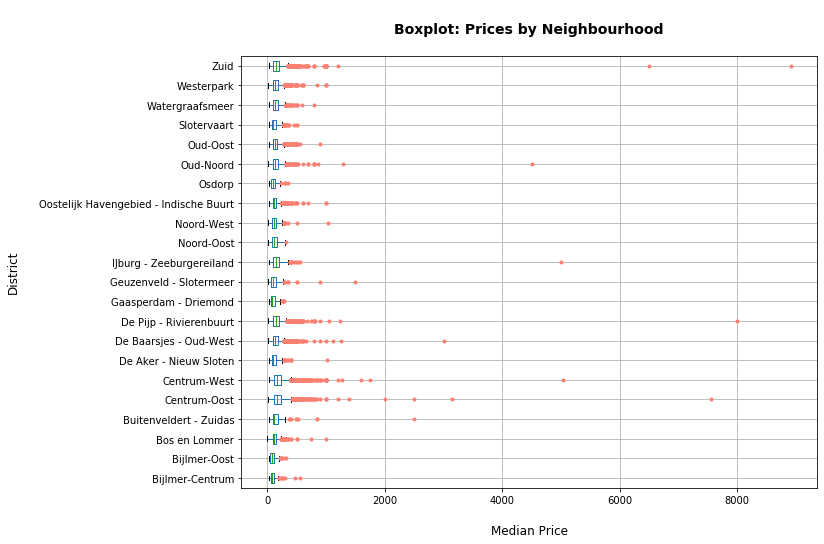

In [0]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

airbnb.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

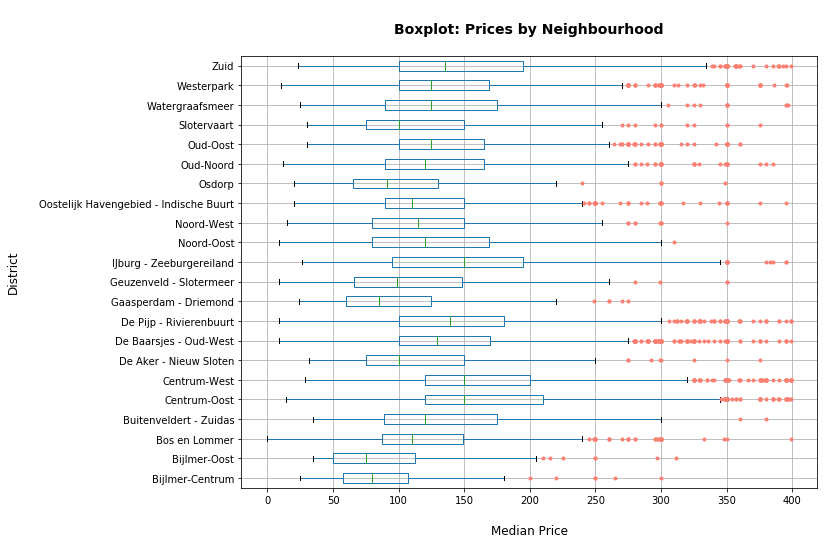

In [0]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

data_filtered.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

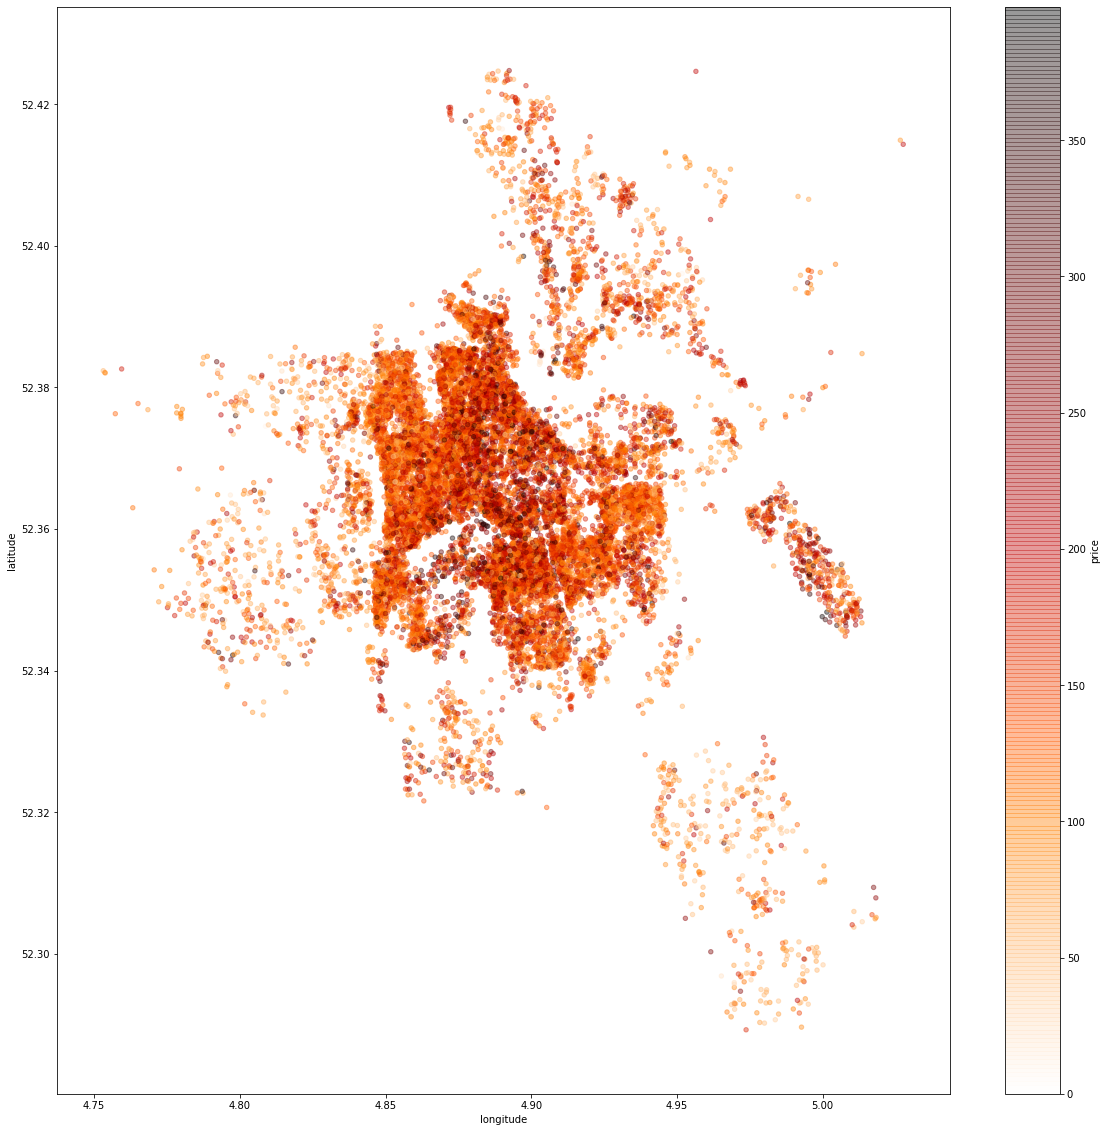

In [0]:
data_filtered.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,20), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

In [0]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,none,https://a0.muscache.com/im/pictures/10272854/8...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",59.0,200.0,60.0,1,20.0,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12,True,False,True,True,True,True,True,True,True,False,False,True,False,3.218476,15.0
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...","Cozy studio on your own private floor, 100% in...",none,https://a0.muscache.com/im/pictures/69979664/3...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",80.0,0.0,0.0,2,0.0,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46,True,True,False,True,True,False,False,True,True

In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_cleansed'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(data_filtered.copy())

In [0]:
x[['neighbourhood_cleansed']] = airbnb_en[['neighbourhood_cleansed']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x.head()

,accommodates,cleaning_fee,security_deposit,TV,iron,dryer,bathrooms,guests_included,extra_people,minimum_nights,review_scores_location,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,availability_30,Laptop_friendly_workspace,smoke_detector,property_type,host_identity_verified,review_scores_rating,review_scores_checkin,review_scores_cleanliness,neighbourhood_cleansed
0,2,60.0,200.0,0,0,0,1.5,1,20.0,3,10.0,0,0,0,0,0,0,8,0,0,0,0,98.0,10.0,10.0,0
1,2,0.0,0.0,1,1,0,1.0,2,0.0,1,10.0,0,0,0,0,0,0,0,0,0,1,0,88.0,10.0,10.0,1
2,3,40.0,300.0,1,0,1,1.0,2,10.0,14,10.0,0,0,0,1,1,1,4,0,0,0,0,100.0,10.0,10.0,2
3,2,0.0,0.0,1,1,0,1.0,1,0.0,2,10.0,0,0,0,0,0,0,6,0,0,2,1,99.0,10.0,10.0,2
4,2,0.0,0.0,0,1,1,1.0,1,0.0,2,10.0,0,0,0,1,0,0,2,1,0,0,1,97.0,10.0,10.0,2


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.417963462220009


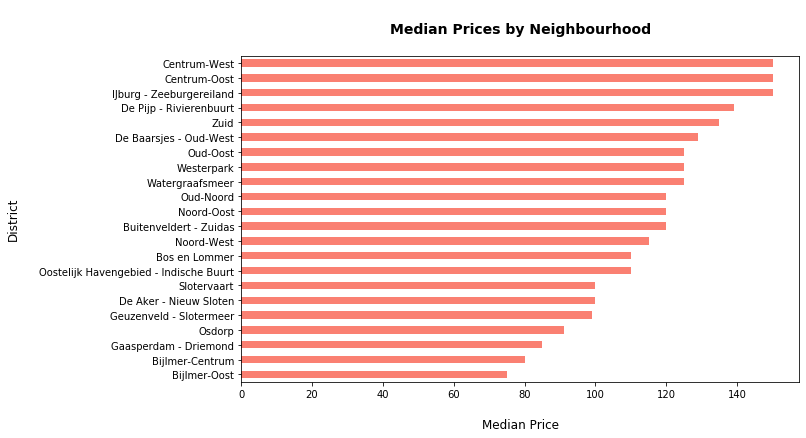

In [0]:
df_grouped = pd.DataFrame(data_filtered.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

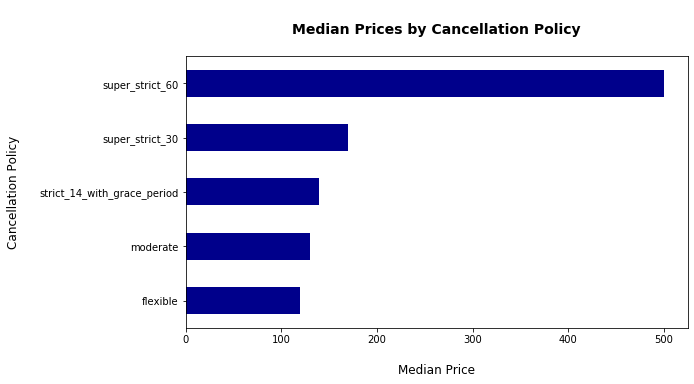

In [0]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(airbnb.groupby(['cancellation_policy'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='cancellation_policy', y='price', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Cancellation Policy\n', fontsize=12)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize=14, fontweight='bold');

In [0]:
X=x

In [0]:
Y=y

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14033, 26)
(6015, 26)


In [0]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [0]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=500)

Train on 14033 samples, validate on 6015 samples
Epoch 1/500
14033/14033 [==============================] - 1s 105us/sample - loss: 13521.9102 - val_loss: 4319.3101
Epoch 2/500
14033/14033 [==============================] - 1s 41us/sample - loss: 3844.8424 - val_loss: 3399.4966
Epoch 3/500
14033/14033 [==============================] - 1s 44us/sample - loss: 3292.8759 - val_loss: 3071.6704
Epoch 4/500
14033/14033 [==============================] - 0s 34us/sample - loss: 3068.1364 - val_loss: 2878.1786
Epoch 5/500
14033/14033 [==============================] - 1s 40us/sample - loss: 2906.1080 - val_loss: 2769.9062
Epoch 6/500
14033/14033 [==============================] - 1s 38us/sample - loss: 2822.1804 - val_loss: 2692.2298
Epoch 7/500
14033/14033 [==============================] - 1s 38us/sample - loss: 2772.8320 - val_loss: 2653.5841
Epoch 8/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2733.7014 - val_loss: 2622.0040
Epoch 9/500
14033/14033 [============

14033/14033 [==============================] - 1s 87us/sample - loss: 2402.9483 - val_loss: 2387.1633
Epoch 72/500
14033/14033 [==============================] - 1s 48us/sample - loss: 2385.4022 - val_loss: 2391.0393
Epoch 73/500
14033/14033 [==============================] - 1s 51us/sample - loss: 2384.6666 - val_loss: 2396.9317
Epoch 74/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2409.7894 - val_loss: 2383.5797
Epoch 75/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2398.3880 - val_loss: 2373.3721
Epoch 76/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2380.4779 - val_loss: 2380.4303
Epoch 77/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2374.4689 - val_loss: 2444.8894
Epoch 78/500
14033/14033 [==============================] - 1s 41us/sample - loss: 2385.4486 - val_loss: 2368.2656
Epoch 79/500
14033/14033 [==============================] - 1s 39us/sample - loss: 2386.7991 

Epoch 142/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2242.4365 - val_loss: 2321.3573
Epoch 143/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2230.0449 - val_loss: 2323.9803
Epoch 144/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2222.9811 - val_loss: 2362.6697
Epoch 145/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2229.6927 - val_loss: 2323.0921
Epoch 146/500
14033/14033 [==============================] - 1s 44us/sample - loss: 2226.1295 - val_loss: 2351.6048
Epoch 147/500
14033/14033 [==============================] - 1s 42us/sample - loss: 2219.1386 - val_loss: 2336.7119
Epoch 148/500
14033/14033 [==============================] - 1s 45us/sample - loss: 2217.2957 - val_loss: 2336.9785
Epoch 149/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2210.5904 - val_loss: 2324.4926
Epoch 150/500
14033/14033 [==============================] - 1s 66us/sam

14033/14033 [==============================] - 1s 58us/sample - loss: 2171.8483 - val_loss: 2370.3235
Epoch 213/500
14033/14033 [==============================] - 1s 47us/sample - loss: 2155.6213 - val_loss: 2370.0214
Epoch 214/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2150.3911 - val_loss: 2403.8444
Epoch 215/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2149.9828 - val_loss: 2400.8155
Epoch 216/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2155.3654 - val_loss: 2378.2412
Epoch 217/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2123.9339 - val_loss: 2373.0917
Epoch 218/500
14033/14033 [==============================] - 1s 50us/sample - loss: 2147.6275 - val_loss: 2420.4201
Epoch 219/500
14033/14033 [==============================] - 1s 44us/sample - loss: 2134.3429 - val_loss: 2380.3938
Epoch 220/500
14033/14033 [==============================] - 0s 30us/sample - loss: 21

Epoch 283/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2089.1131 - val_loss: 2446.6864
Epoch 284/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2087.3536 - val_loss: 2411.6959
Epoch 285/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2075.6390 - val_loss: 2581.6269
Epoch 286/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2119.4056 - val_loss: 2401.1194
Epoch 287/500
14033/14033 [==============================] - 1s 36us/sample - loss: 2076.3024 - val_loss: 2417.6614
Epoch 288/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2072.6981 - val_loss: 2464.6782
Epoch 289/500
14033/14033 [==============================] - 1s 38us/sample - loss: 2056.3100 - val_loss: 2400.9445
Epoch 290/500
14033/14033 [==============================] - 1s 73us/sample - loss: 2076.4973 - val_loss: 2438.1063
Epoch 291/500
14033/14033 [==============================] - 1s 45us/sam

14033/14033 [==============================] - 1s 44us/sample - loss: 2030.3058 - val_loss: 2458.7209
Epoch 354/500
14033/14033 [==============================] - 1s 36us/sample - loss: 2027.2055 - val_loss: 2486.2308
Epoch 355/500
14033/14033 [==============================] - 1s 38us/sample - loss: 2015.3136 - val_loss: 2457.3698
Epoch 356/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2034.6170 - val_loss: 2458.5384
Epoch 357/500
14033/14033 [==============================] - 1s 47us/sample - loss: 2022.0966 - val_loss: 2441.2910
Epoch 358/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2027.8521 - val_loss: 2444.4807
Epoch 359/500
14033/14033 [==============================] - 1s 37us/sample - loss: 2008.3661 - val_loss: 2465.7795
Epoch 360/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2022.1300 - val_loss: 2505.3576
Epoch 361/500
14033/14033 [==============================] - 0s 30us/sample - loss: 20

Epoch 424/500
14033/14033 [==============================] - 0s 30us/sample - loss: 1981.4740 - val_loss: 2512.3000
Epoch 425/500
14033/14033 [==============================] - 0s 32us/sample - loss: 1988.7347 - val_loss: 2539.7229
Epoch 426/500
14033/14033 [==============================] - 1s 36us/sample - loss: 2005.2388 - val_loss: 2475.7152
Epoch 427/500
14033/14033 [==============================] - 0s 33us/sample - loss: 1981.5481 - val_loss: 2472.4792
Epoch 428/500
14033/14033 [==============================] - 0s 34us/sample - loss: 1993.5972 - val_loss: 2477.3629
Epoch 429/500
14033/14033 [==============================] - 0s 32us/sample - loss: 1976.0877 - val_loss: 2488.3870
Epoch 430/500
14033/14033 [==============================] - 0s 36us/sample - loss: 1985.7299 - val_loss: 2491.7163
Epoch 431/500
14033/14033 [==============================] - 0s 29us/sample - loss: 1991.0866 - val_loss: 2492.0391
Epoch 432/500
14033/14033 [==============================] - 0s 30us/sam

14033/14033 [==============================] - 0s 30us/sample - loss: 1945.6528 - val_loss: 2519.4847
Epoch 495/500
14033/14033 [==============================] - 0s 35us/sample - loss: 1947.0207 - val_loss: 2553.4659
Epoch 496/500
14033/14033 [==============================] - 1s 43us/sample - loss: 1955.6561 - val_loss: 2581.0881
Epoch 497/500
14033/14033 [==============================] - 1s 43us/sample - loss: 1921.7960 - val_loss: 2534.6689
Epoch 498/500
14033/14033 [==============================] - 0s 32us/sample - loss: 1930.0364 - val_loss: 2537.4269
Epoch 499/500
14033/14033 [==============================] - 0s 31us/sample - loss: 1922.5933 - val_loss: 2556.2737
Epoch 500/500
14033/14033 [==============================] - 0s 29us/sample - loss: 1945.3225 - val_loss: 2534.3353


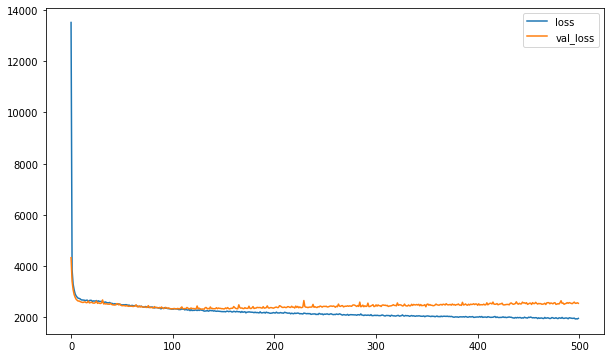

In [0]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  31.263281261335628
MSE:  1830.8692092555243
RMSE:  42.78865748367813
R2 Square:  0.5790436406304325
=========Testing Result=======
MAE:  36.21781262677606
MSE:  2534.33532645762
RMSE:  50.34218237678637
R2 Square:  0.4209950280533028


In [0]:
y_test

,price
8624,330.0
14093,125.0
1441,130.0
11354,300.0
5003,345.0
...,...
16383,150.0
9450,72.0
18200,130.0
1134,125.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14033, 26)
(6015, 26)


In [0]:
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [0]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [0]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=500)

Train on 14033 samples, validate on 6015 samples
Epoch 1/500
14033/14033 [==============================] - 1s 93us/sample - loss: 13671.5645 - val_loss: 4067.0539
Epoch 2/500
14033/14033 [==============================] - 1s 37us/sample - loss: 3628.9091 - val_loss: 3256.0580
Epoch 3/500
14033/14033 [==============================] - 0s 34us/sample - loss: 3185.6326 - val_loss: 2983.3270
Epoch 4/500
14033/14033 [==============================] - 1s 39us/sample - loss: 2986.3997 - val_loss: 2834.0400
Epoch 5/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2872.2017 - val_loss: 2755.3393
Epoch 6/500
14033/14033 [==============================] - 1s 42us/sample - loss: 2831.5918 - val_loss: 2704.1601
Epoch 7/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2743.2300 - val_loss: 2661.9708
Epoch 8/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2715.9431 - val_loss: 2633.0525
Epoch 9/500
14033/14033 [=============

Epoch 72/500
14033/14033 [==============================] - 1s 41us/sample - loss: 2397.1480 - val_loss: 2429.1983
Epoch 73/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2369.2741 - val_loss: 2372.9737
Epoch 74/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2380.4079 - val_loss: 2376.7705
Epoch 75/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2362.6577 - val_loss: 2369.5292
Epoch 76/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2373.5224 - val_loss: 2356.4881
Epoch 77/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2381.9231 - val_loss: 2447.1353
Epoch 78/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2350.0994 - val_loss: 2342.8275
Epoch 79/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2364.6345 - val_loss: 2354.1193
Epoch 80/500
14033/14033 [==============================] - 0s 29us/sample - los

Epoch 143/500
14033/14033 [==============================] - 1s 41us/sample - loss: 2219.5683 - val_loss: 2288.0067
Epoch 144/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2230.4812 - val_loss: 2318.0520
Epoch 145/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2224.3923 - val_loss: 2325.1090
Epoch 146/500
14033/14033 [==============================] - 1s 37us/sample - loss: 2212.2439 - val_loss: 2315.2044
Epoch 147/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2225.1442 - val_loss: 2287.7097
Epoch 148/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2203.1259 - val_loss: 2287.0347
Epoch 149/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2215.2930 - val_loss: 2311.3537
Epoch 150/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2194.5879 - val_loss: 2329.2924
Epoch 151/500
14033/14033 [==============================] - 1s 37us/sam

14033/14033 [==============================] - 1s 84us/sample - loss: 2163.3340 - val_loss: 2455.8008
Epoch 214/500
14033/14033 [==============================] - 1s 51us/sample - loss: 2154.5048 - val_loss: 2307.6954
Epoch 215/500
14033/14033 [==============================] - 1s 41us/sample - loss: 2145.9095 - val_loss: 2355.6681
Epoch 216/500
14033/14033 [==============================] - 1s 42us/sample - loss: 2142.9582 - val_loss: 2416.7050
Epoch 217/500
14033/14033 [==============================] - 1s 85us/sample - loss: 2127.8332 - val_loss: 2368.4195
Epoch 218/500
14033/14033 [==============================] - 1s 106us/sample - loss: 2134.8123 - val_loss: 2307.4008
Epoch 219/500
14033/14033 [==============================] - 1s 63us/sample - loss: 2164.7958 - val_loss: 2321.9225
Epoch 220/500
14033/14033 [==============================] - 1s 79us/sample - loss: 2154.3741 - val_loss: 2325.9478
Epoch 221/500
14033/14033 [==============================] - 1s 81us/sample - loss: 2

In [0]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
X_train

In [0]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

In [0]:
X

In [0]:
x

In [0]:
x